In [37]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
orders = pd.read_csv('data/orders.csv')
order_product = pd.read_csv('data/order_product.csv')
shoppers = pd.read_csv('data/shoppers.csv')
storebranch = pd.read_csv('data/storebranch.csv')

In [3]:
orders.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861
1,0d37a1eea001f01b40232ffd496ff663,18.177712,-100.357051,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732
2,528428e9b9eb5d3bd0dbdd8da692b087,18.266832,-100.317553,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248884,-100.322622,2,10:00:00,09:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.229110,-100.322672,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208


In [4]:
orders.columns

Index(['order_id', 'lat', 'lng', 'dow', 'promised_time', 'actual_time',
       'on_demand', 'picker_id', 'driver_id', 'store_branch_id',
       'total_minutes'],
      dtype='object')

In [5]:
orders.drop(['lat', 'lng', 'promised_time'], axis=1, inplace=True)

In [6]:
print("Num orders in orders: " ,len(orders['order_id'].unique()))
print("Num orders in order_product: " ,len(order_product['order_id'].unique()))

Num orders in orders:  7295
Num orders in order_product:  7278


In [14]:
order_product.columns

Index(['order_id', 'product_id', 'quantity', 'quantity_found', 'buy_unit'], dtype='object')

In [16]:
order_product.drop(['product_id', 'quantity_found', 'buy_unit'], axis=1, inplace=True)

In [17]:
products = order_product.groupby('order_id').agg([np.size, np.sum])['quantity']

In [18]:
products.reset_index(inplace=True)

In [19]:
products.rename(columns={'size': 'quantity_products', 'sum': 'sum_products'}, inplace=True)

In [49]:
matrix = pd.merge(orders, products, on='order_id')

In [50]:
matrix.head()

,order_id,dow,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,quantity_products,sum_products
0,6abd5e28d01b7c733fe37485294235dc,2,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,27.0,24.722
1,0d37a1eea001f01b40232ffd496ff663,2,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,103.0,189.562
2,528428e9b9eb5d3bd0dbdd8da692b087,2,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,6.0,6.000
3,d3f7be6d64eae7405b7bf024e04807a2,2,09:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,17.0,38.300
4,e0ad6533b6cd9a382ec6c1d473c5036c,2,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,44.0,38.721


In [28]:
shoppers.columns

Index(['shopper_id', 'seniority', 'found_rate', 'picking_speed',
       'accepted_rate', 'rating'],
      dtype='object')

In [30]:
shoppers.drop(['found_rate', 'picking_speed', 'accepted_rate'], axis=1, inplace=True)

In [35]:
shoppers.head()

,shopper_id,seniority,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,4.84


Text(0.5,1,'Missing values')

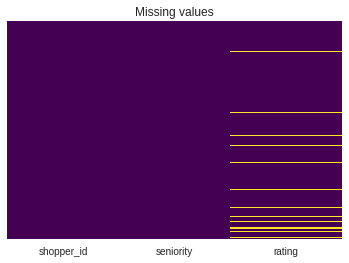

In [38]:
sns.heatmap(shoppers.isnull(), yticklabels=False, cbar=False, cmap='viridis').set_title('Missing values')

In [42]:
shoppers['rating'] = shoppers.groupby('seniority').transform(lambda x: x.fillna(x.mean()))

In [51]:
matrix = pd.merge(matrix, shoppers, how='left', left_on=['picker_id'], right_on=['shopper_id'])

In [53]:
matrix = pd.merge(matrix, shoppers, how='left', left_on=['driver_id'], right_on=['shopper_id'])

In [54]:
matrix.head()

,order_id,dow,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,quantity_products,sum_products,shopper_id_x,seniority_x,rating_x,shopper_id_y,seniority_y,rating_y
0,6abd5e28d01b7c733fe37485294235dc,2,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,27.0,24.722,09bb5bfe76adbb474dddbdd111a51623,ADVANCED,4.68,09bb5bfe76adbb474dddbdd111a51623,ADVANCED,4.68
1,0d37a1eea001f01b40232ffd496ff663,2,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,103.0,189.562,c4c722114a82fa21654e57e9636d68b0,ADVANCED,4.76,c4c722114a82fa21654e57e9636d68b0,ADVANCED,4.76
2,528428e9b9eb5d3bd0dbdd8da692b087,2,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,6.0,6.000,e15c7a67d0ea9a54dffb410bc1d8528b,INTERMEDIATE,4.96,e15c7a67d0ea9a54dffb410bc1d8528b,INTERMEDIATE,4.96
3,d3f7be6d64eae7405b7bf024e04807a2,2,09:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,17.0,38.300,d1f0bd4b237c1358f09db22076b940e7,INTERMEDIATE,4.92,d1f0bd4b237c1358f09db22076b940e7,INTERMEDIATE,4.92
4,e0ad6533b6cd9a382ec6c1d473c5036c,2,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,44.0,38.721,06a71e8ab0c6db5ce22a4689fd76a3f4,ADVANCED,4.92,06a71e8ab0c6db5ce22a4689fd76a3f4,ADVANCED,4.92


In [55]:
matrix.columns

Index(['order_id', 'dow', 'actual_time', 'on_demand', 'picker_id', 'driver_id',
       'store_branch_id', 'total_minutes', 'quantity_products', 'sum_products',
       'shopper_id_x', 'seniority_x', 'rating_x', 'shopper_id_y',
       'seniority_y', 'rating_y'],
      dtype='object')

In [56]:
matrix.drop(['shopper_id_x', 'shopper_id_y'], axis=1, inplace=True)

In [57]:
matrix.rename(columns={'seniority_x': 'seniority_picker', 
                       'rating_x': 'rating_picker',
                       'seniority_y': 'seniority_driver',
                       'rating_y': 'rating_driver'}, inplace=True)

In [58]:
matrix.head()

,order_id,dow,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,quantity_products,sum_products,seniority_picker,rating_picker,seniority_driver,rating_driver
0,6abd5e28d01b7c733fe37485294235dc,2,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,27.0,24.722,ADVANCED,4.68,ADVANCED,4.68
1,0d37a1eea001f01b40232ffd496ff663,2,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,103.0,189.562,ADVANCED,4.76,ADVANCED,4.76
2,528428e9b9eb5d3bd0dbdd8da692b087,2,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,6.0,6.000,INTERMEDIATE,4.96,INTERMEDIATE,4.96
3,d3f7be6d64eae7405b7bf024e04807a2,2,09:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,17.0,38.300,INTERMEDIATE,4.92,INTERMEDIATE,4.92
4,e0ad6533b6cd9a382ec6c1d473c5036c,2,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,44.0,38.721,ADVANCED,4.92,ADVANCED,4.92
